In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

Получение данных

In [14]:
df = pd.read_csv('/content/clustering_test_work.csv')

In [15]:
df

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1.0,123.0,17920.0
1,1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1.0,182.0,17920.0
2,2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1.0,243.0,17920.0
3,3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1.0,304.0,17920.0
4,4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1.0,365.0,17920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414750,1414750,79262066838,2021-09-20,2,4980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,1.0,123.0,4980.0
1414751,1414751,79262066838,2021-11-20,3,4980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,1.0,184.0,4980.0
1414752,1414752,79262066838,2022-01-20,4,4980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,1.0,245.0,4980.0
1414753,1414753,79262066838,2022-03-20,5,4980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,1.0,304.0,4980.0


In [18]:
df[df.actual_id == 2977]

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
2461,2461,2977,2022-08-09,2,9980.0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,122.0,9980.0
2462,2462,2977,2022-10-09,3,9980.0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,183.0,9980.0
2463,2463,2977,2022-12-07,4,9980.0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,242.0,9980.0


In [19]:
df["period_end"] = pd.to_datetime(df["period_end"])
dates = []
for i in df["period_end"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("Дата начала логов:",max(dates))
print("Дата конца логов:",min(dates))

Дата начала логов: 2022-12-07
Дата конца логов: 2021-01-01


In [20]:
df = df.sort_values(['actual_id', 'num'], ascending = [True, False])
# df = df.groupby('actual_id').first().reset_index()

In [21]:
df = df.dropna().reset_index()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414754 entries, 0 to 1414753
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   index                1414754 non-null  int64         
 1   Unnamed: 0           1414754 non-null  int64         
 2   actual_id            1414754 non-null  int64         
 3   period_end           1414754 non-null  datetime64[ns]
 4   num                  1414754 non-null  int64         
 5   revenue_lastyear     1414754 non-null  float64       
 6   quantity_lastyear    1414754 non-null  int64         
 7   orders_lastyear      1414754 non-null  int64         
 8   orders_refund        1414754 non-null  int64         
 9   ratio_not_dh         1414754 non-null  float64       
 10  ratio_online         1414754 non-null  float64       
 11  ratio_refund         1414754 non-null  float64       
 12  avg_ratio_purchase   1414754 non-null  float64       
 1

In [23]:
df['aov'] = df['aov'].astype('float')
df['recency'] = df['recency'].astype('int')
df['orders_lastyear'] = df['orders_lastyear'].astype('int')

In [24]:
df.describe()

,index,Unnamed: 0,actual_id,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06,1.414754e+06
mean,7.073765e+05,7.073765e+05,4.353254e+13,6.114436e+00,3.143870e+04,3.355928e+00,2.019415e+00,1.258636e-01,7.764770e-01,2.378175e-01,3.712018e-02,9.662013e-01,2.309838e+00,1.038393e+00,2.392884e+02,1.195434e+04
std,4.084044e+05,4.084044e+05,1.244216e+16,3.173046e+00,6.224506e+04,6.130661e+00,3.124155e+00,7.347985e-01,4.014806e-01,3.829616e-01,1.552278e-01,1.429612e-01,2.461604e+00,1.921438e-01,1.794106e+02,1.213279e+04
min,0.000000e+00,0.000000e+00,6.380000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.536882e+05,3.536882e+05,7.906778e+10,3.000000e+00,3.980000e+03,1.000000e+00,1.000000e+00,0.000000e+00,8.409669e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.130000e+02,3.515333e+03
50%,7.073765e+05,7.073765e+05,7.915205e+10,6.000000e+00,1.398000e+04,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.840000e+02,9.980000e+03
75%,1.061065e+06,1.061065e+06,7.918499e+10,8.000000e+00,3.498000e+04,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.630000e+02,1.644000e+04
max,1.414753e+06,1.414753e+06,4.415340e+18,1.400000e+01,7.365842e+06,6.290000e+02,2.810000e+02,1.260000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.380000e+02,2.000000e+00,8.270000e+02,4.307900e+05


Кто-то заказал 276 заказов, но это сильное отклонение, в среднем заказывают 2,5 заказа

Гистограмма распределения количества покупок за последний год

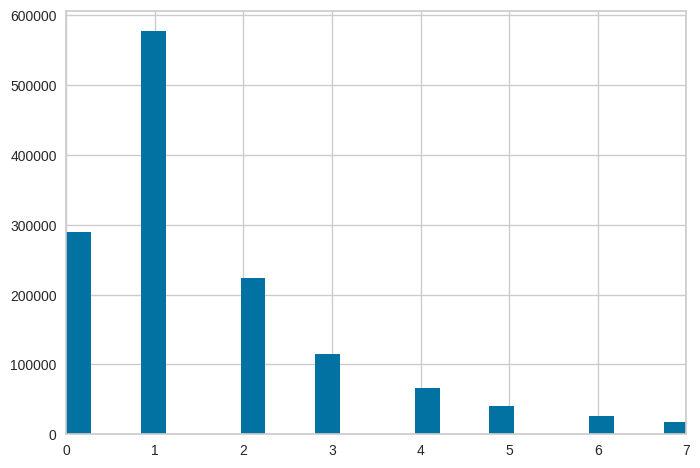

In [25]:
plt.hist(df.orders_lastyear, bins = 1000)
plt.xlim(0, 7)
plt.show()

Гистограмма распределения дней от последних покупок

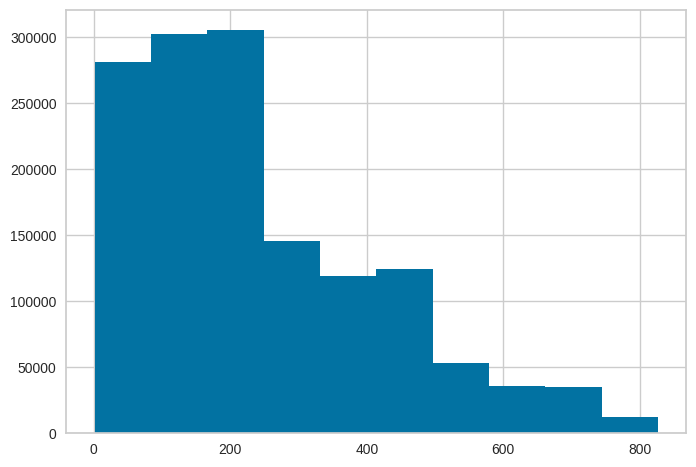

In [26]:
plt.hist(df.recency)
plt.show()

Распределение среднего чека

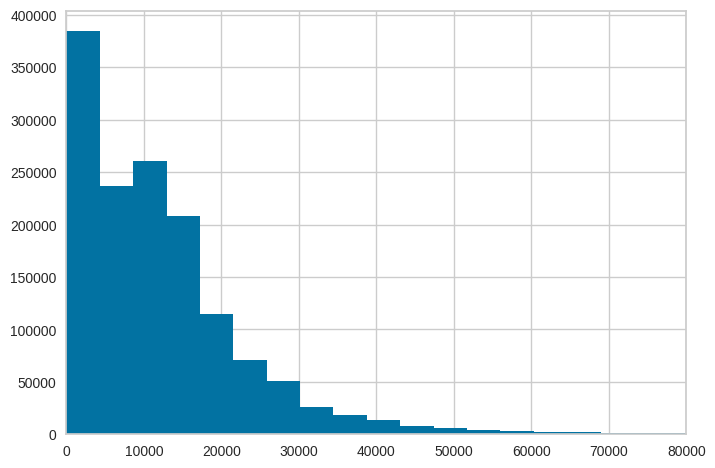

In [27]:
plt.hist(df.aov, bins = 100)
plt.xlim(0, 80000)
plt.show()

Как долго пользователи в базе (в количестве месяцев), чем больше чиcло, тем позже пришел человек

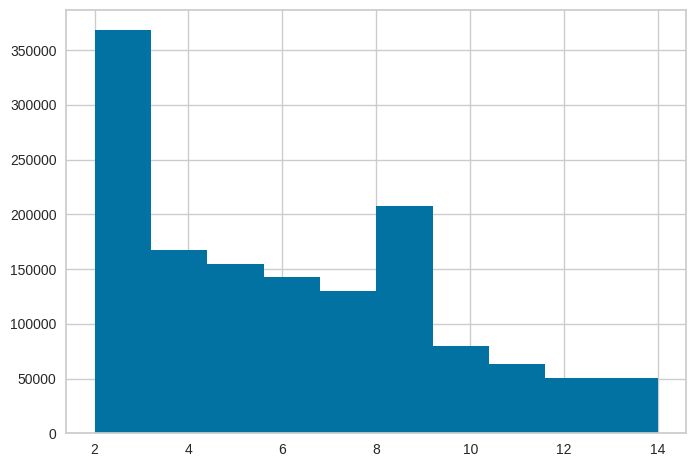

In [28]:
plt.hist(df.num)
plt.show()

In [29]:
df = df.drop(columns=[ 'num', 'index', 'Unnamed: 0'])
user_id = df.pop('actual_id')
period_end = df.pop('period_end')

Выделяем фичу real orders, заказы, которые были куплены и не возвращены

In [30]:
df["real_orders"] = df["orders_lastyear"]-df['orders_refund']

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

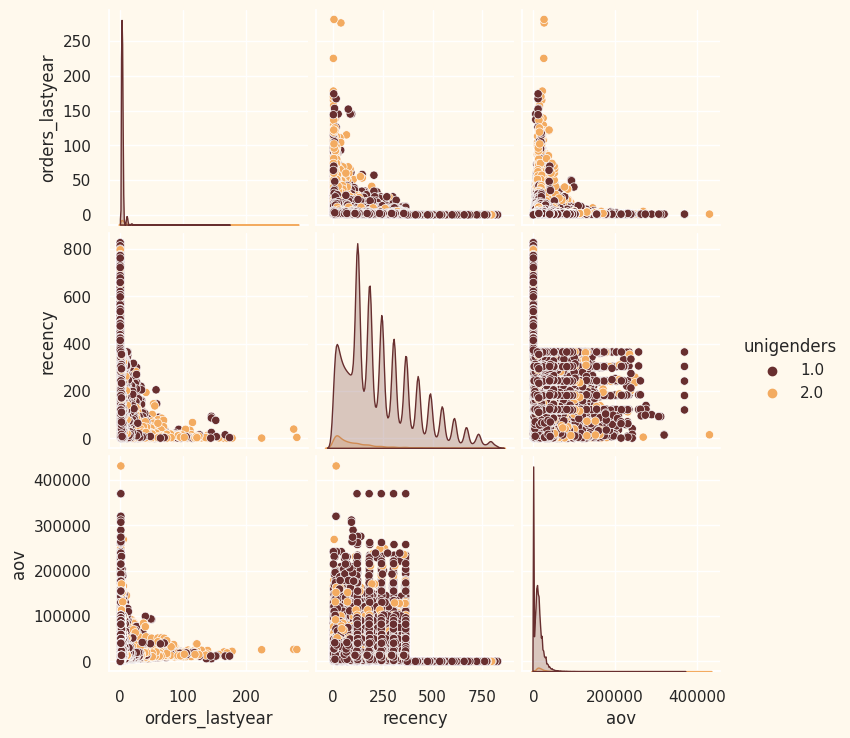

In [31]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "orders_lastyear", "recency", "aov", "unigenders"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "unigenders",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

Матрица корреляций

<Axes: >

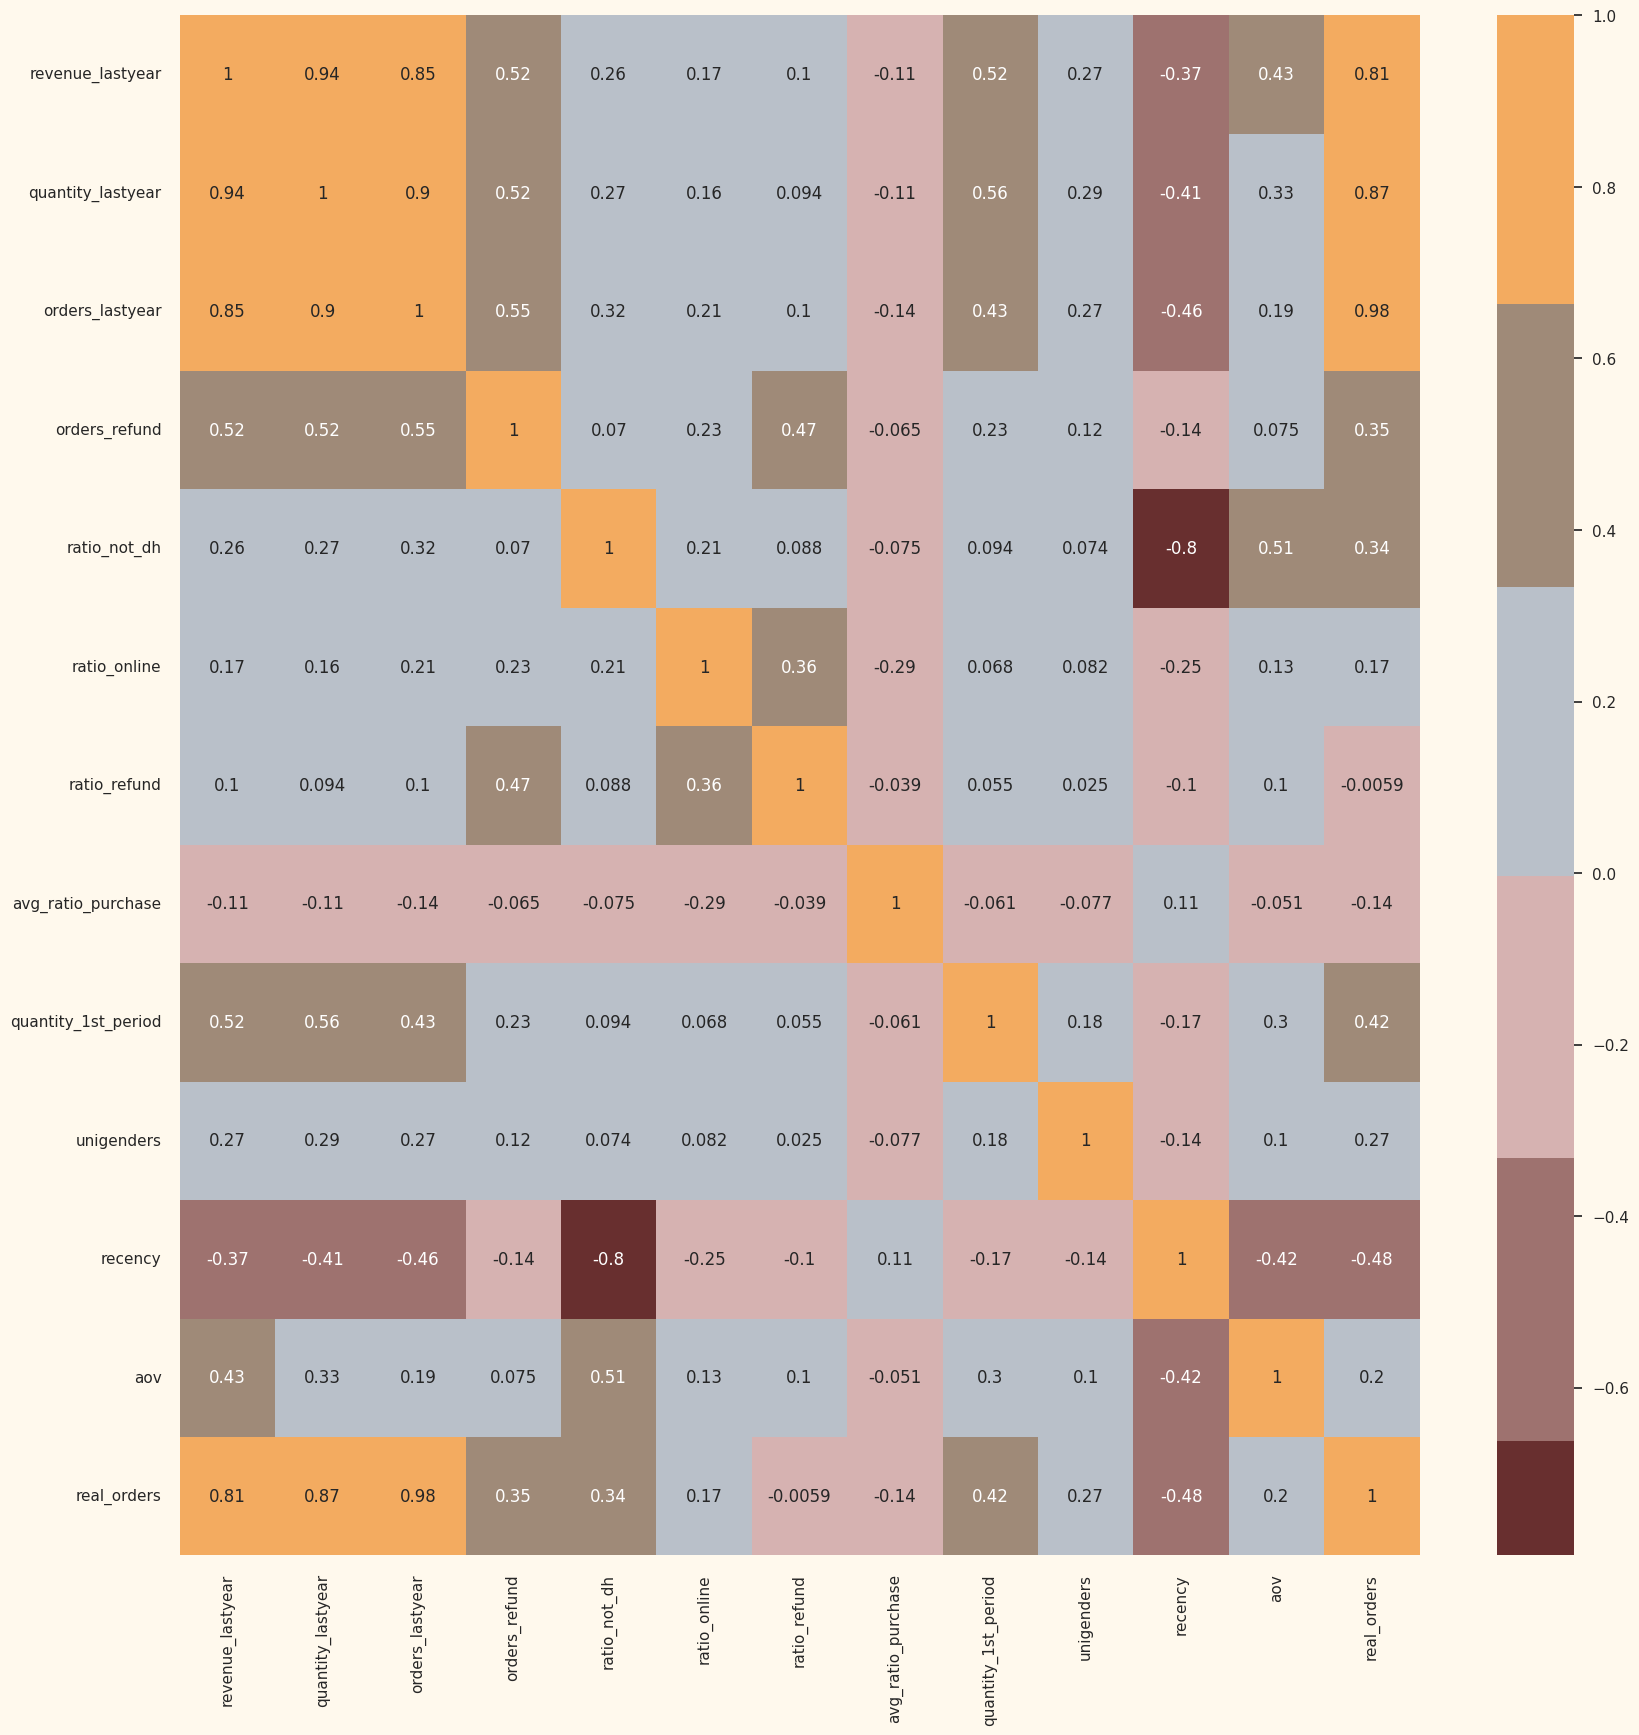

In [32]:
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [33]:
df

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov,real_orders
0,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0,768,0.0,0
1,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0,728,0.0,0
2,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0,667,0.0,0
3,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0,606,0.0,0
4,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0,545,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414749,26920.0,4,2,0,1.0,0.5,0.0,1.0,4.0,1.0,355,13460.0,2
1414750,26920.0,4,2,0,1.0,0.5,0.0,1.0,4.0,1.0,294,13460.0,2
1414751,26920.0,4,2,0,1.0,0.5,0.0,1.0,4.0,1.0,233,13460.0,2
1414752,26920.0,4,2,0,1.0,0.5,0.0,1.0,4.0,1.0,171,13460.0,2


Предобработка данных с помощью StandrdScaler, масштабирование данных и приведение к диапазону от 0 до

In [34]:
ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


Понижение размерности данных с помощью PCA

In [35]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1414754.0,2.700030e-17,2.252548,-2.818604,-0.923234,-0.323485,0.639124,195.146291
col2,1414754.0,-4.660765e-17,1.303984,-9.601062,-0.781592,-0.392884,0.465472,100.999395
col3,1414754.0,2.153595e-17,1.229525,-16.594930,-0.662954,-0.383253,0.315634,48.900091


In [36]:
PCA_ds

,col1,col2,col3
0,-2.627923,2.630155,0.407500
1,-2.566984,2.522799,0.380138
2,-2.474051,2.359081,0.338412
3,-2.381118,2.195363,0.296686
4,-2.288186,2.031644,0.254959
...,...,...,...
1414749,0.150660,-0.098988,-0.030395
1414750,0.243592,-0.262706,-0.072121
1414751,0.336525,-0.426424,-0.113847
1414752,0.430981,-0.592826,-0.156257


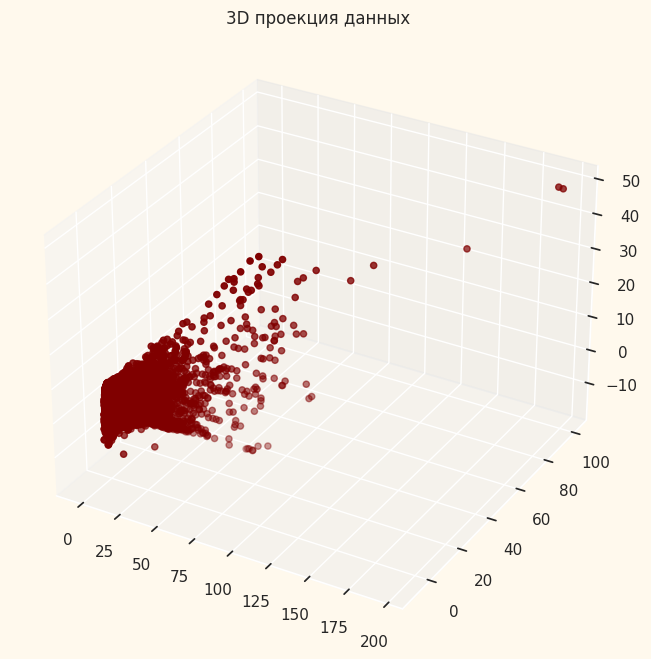

In [37]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D проекция данных")
plt.show()

Метод колена для определения оптимального количества кластеров

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

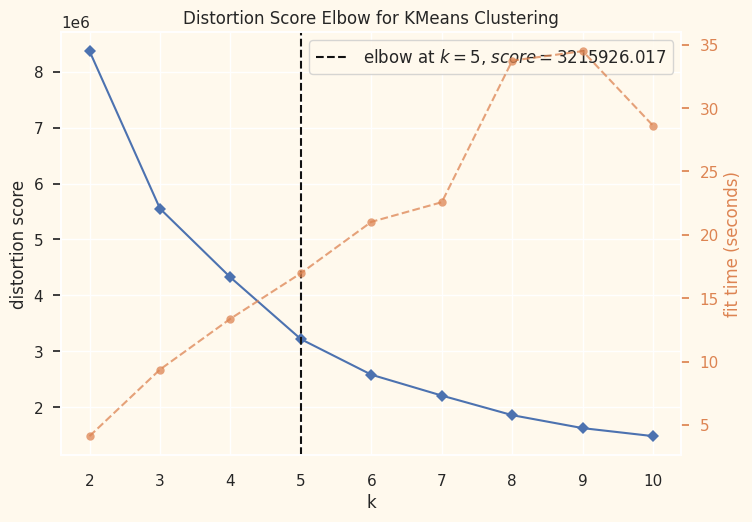

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [39]:
PCA_ds.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414754 entries, 0 to 1414753
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   col1    1414754 non-null  float64
 1   col2    1414754 non-null  float64
 2   col3    1414754 non-null  float64
dtypes: float64(3)
memory usage: 32.4 MB


Понижаем размер float:

In [40]:
# PCA_ds = PCA_ds.astype({"col1":"float16", "col2":"float16", "col3":"float16", })

KMeans кластеризация

In [41]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, random_state=1)

kmeans.fit(PCA_ds)

PCA_ds["Clusters"] = kmeans.labels_
df["Clusters"]= kmeans.labels_

Выводим графики распределений пользователей по некоторым интересным фичам:

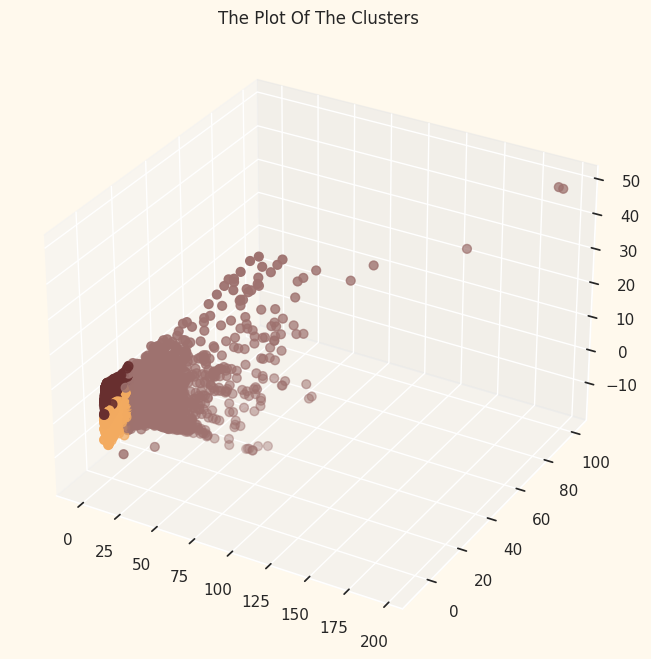

In [43]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

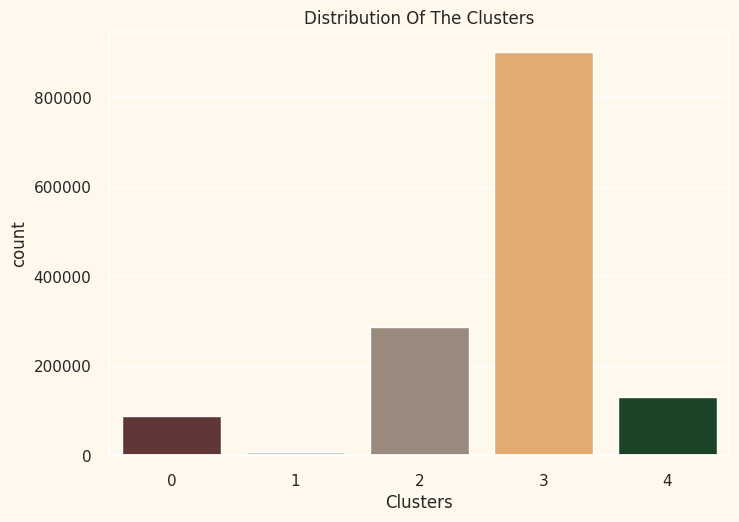

In [64]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#134B21"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

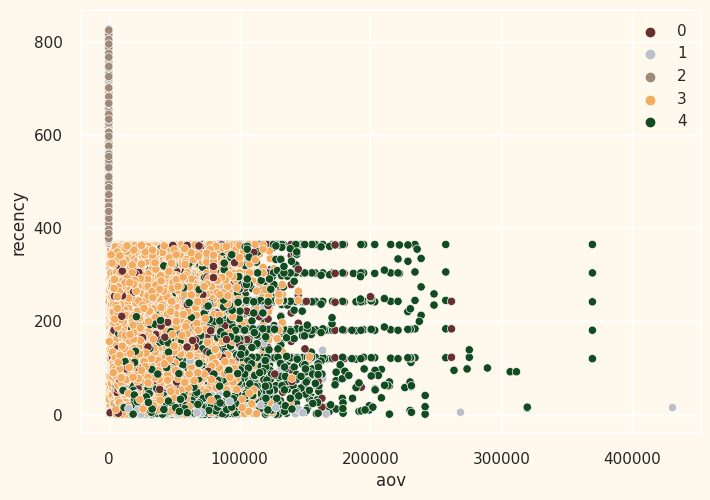

In [65]:
pl = sns.scatterplot(data = df,x=df["aov"], y=df["recency"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

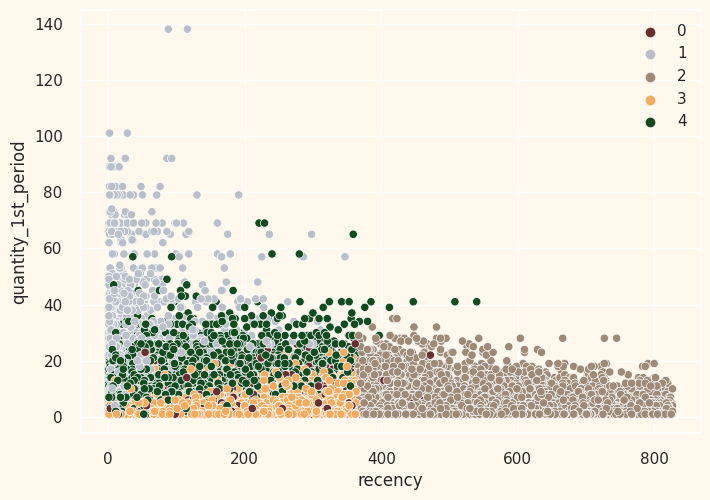

In [66]:
pl = sns.scatterplot(data = df,x=df["recency"], y=df["quantity_1st_period"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

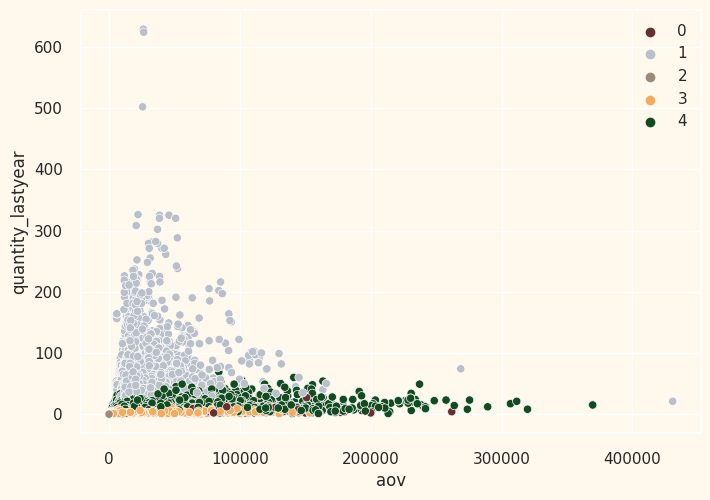

In [67]:
pl = sns.scatterplot(data = df,x=df["aov"], y=df["quantity_lastyear"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

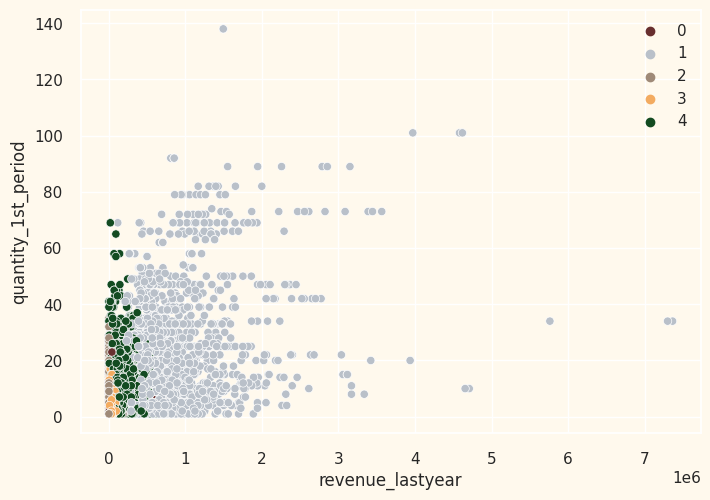

In [68]:
pl = sns.scatterplot(data = df,x=df["revenue_lastyear"], y=df["quantity_1st_period"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

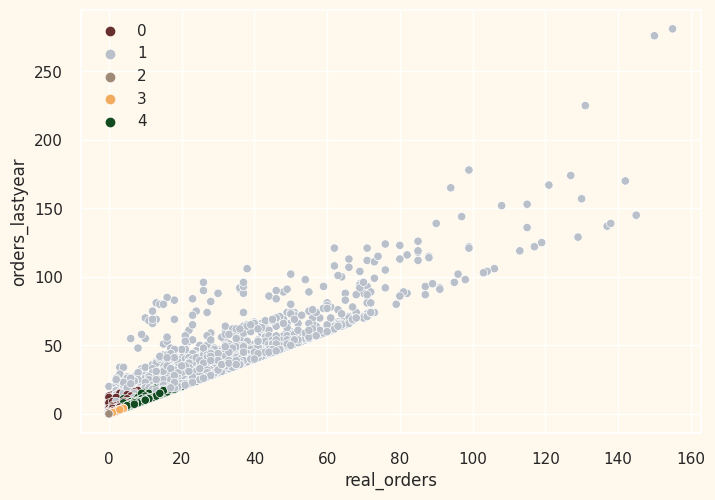

In [69]:
pl = sns.scatterplot(data = df,x=df["real_orders"], y=df["orders_lastyear"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

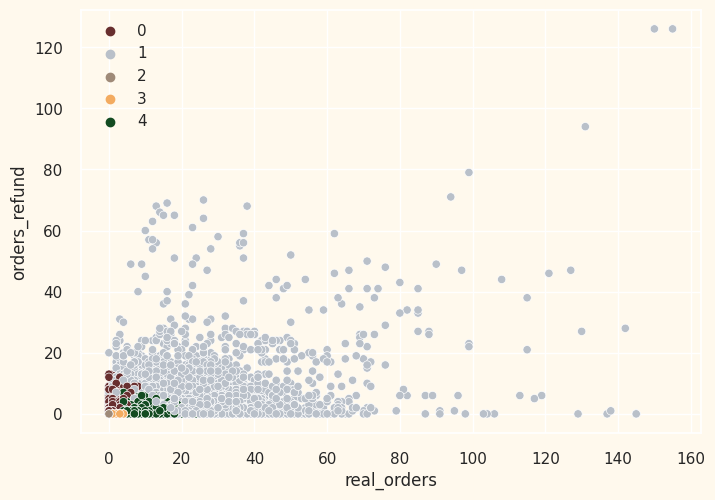

In [70]:
pl = sns.scatterplot(data = df,x=df["real_orders"], y=df["orders_refund"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

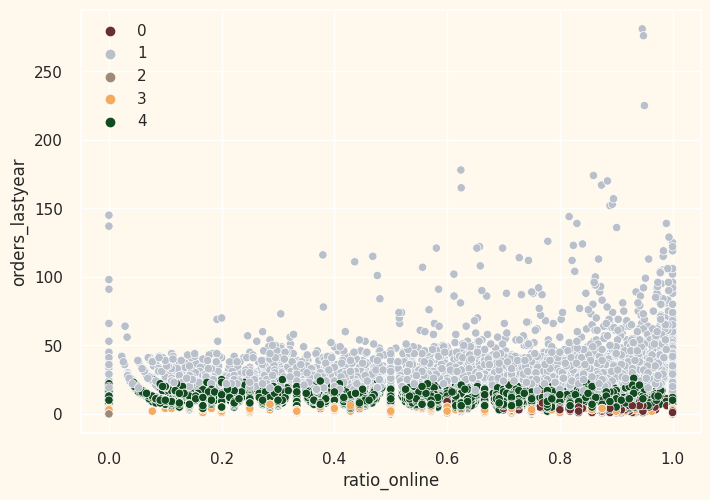

In [71]:
pl = sns.scatterplot(data = df,x=df["ratio_online"], y=df["orders_lastyear"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


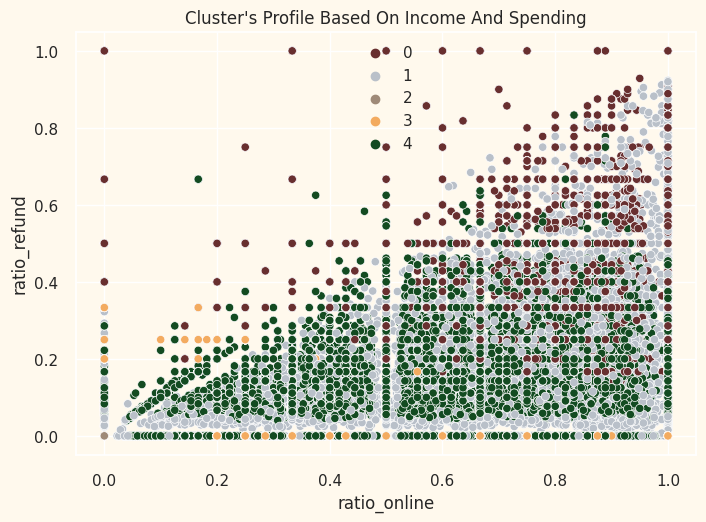

In [72]:
pl = sns.scatterplot(data = df,x=df["ratio_online"], y=df["ratio_refund"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

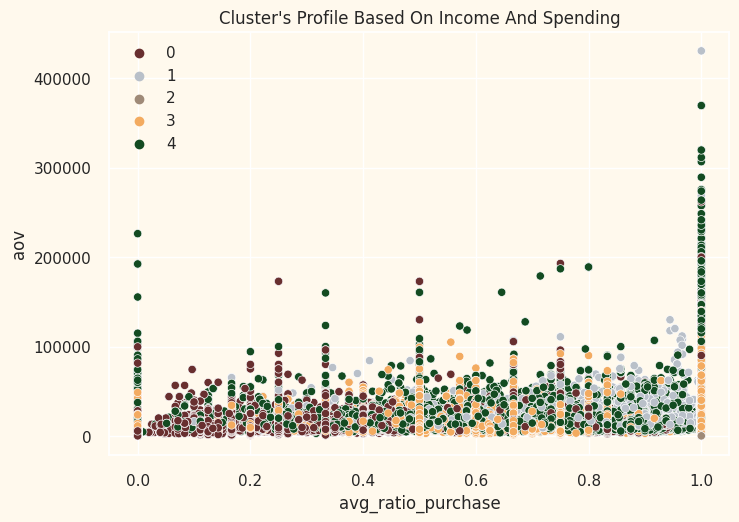

In [73]:
pl = sns.scatterplot(data = df,x=df["avg_ratio_purchase"], y=df["aov"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Считаем активными пользователями - тех, кто покупал не раньше, чем год назад

In [55]:
df['period_end'] = period_end
df['actual_id'] = user_id
df = df.sort_values(by=['period_end'])

In [60]:
df

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov,real_orders,Clusters,period_end,actual_id
1198370,67180.0,7,3,0,1.000000,1.000000,0.0,1.0,5.0,1.0,61,22393.333333,3,3,2021-01-01,79219357047
1148060,29980.0,1,1,1,1.000000,1.000000,1.0,0.5,1.0,1.0,122,29980.000000,0,0,2021-01-01,79213213643
1305644,5806.0,1,1,0,1.000000,0.500000,0.0,1.0,1.0,1.0,122,5806.000000,1,3,2021-01-01,79251319904
132625,92690.0,6,4,0,0.958631,1.000000,0.0,1.0,2.0,1.0,7,23172.500000,4,3,2021-01-01,79031579126
1148153,27159.0,3,2,0,1.000000,0.000000,0.0,1.0,3.0,1.0,105,13579.500000,2,3,2021-01-01,79213219796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836955,32543.0,3,2,0,1.000000,0.333333,0.0,1.0,2.0,1.0,172,16271.500000,2,3,2022-12-07,79163599020
836954,3480.0,1,1,0,1.000000,0.000000,0.0,1.0,1.0,1.0,90,3480.000000,1,3,2022-12-07,79163598854
836943,30940.0,3,3,0,1.000000,0.000000,0.0,1.0,1.0,1.0,147,10313.333333,3,3,2022-12-07,79163598590
837068,0.0,0,0,0,0.000000,0.000000,0.0,1.0,1.0,1.0,389,0.000000,0,2,2022-12-07,79163601694


In [61]:
matrix = np.zeros((5, 5))
for id, i in df[["actual_id", "Clusters"]].groupby('actual_id'):
    arr = i['Clusters'].values
    prev = arr[0]
    for j in arr[1:]:
      matrix[prev][j] += 1
      prev = j

In [62]:
matrix = matrix.astype("int")

Матрица переходов пользователей из кластера в кластер

In [63]:
matrix

array([[ 66475,     57,   5205,   4665,   2930],
       [    31,   5611,      0,      3,    881],
       [   511,      0, 205233,   7577,    169],
       [  5647,      6,  76737, 710818,  17328],
       [  1977,   1571,    612,  12431,  99781]])

In [ ]:
len(df[df.Clusters==0])

457644

In [ ]:
len(df[df.Clusters==1])

125746

In [ ]:
len(df[df.Clusters==2])

15297

In [ ]:
len(df[df.Clusters==3])

220260

In [ ]:
len(df[df.Clusters==4])

1428627

Выводы:
Elbow метод показал оптимальное количество кластеров - 5. Исходя из графиков и матрицы перехода из кластера в кластер выпишем характеристики каждого кластера.


*   0-й кластер, Скупой покупатель

---


Покупатели данного кластера наименее интересны нам. В основном они покупают онлайн, и достаточно часто сдают товар. Их покупательская способность немного выше, чем у обычных покупателей из 3-го кластера, но их особенность заказывать много онлайн и не выкупать в итоге товар перекрывает все плюсы. Большая часть так и остается в этом кластере. Меньшая уходит в отток, поэтому данный кластер частично предоттоковый.
*   1-й кластер  Шопоголик

---

Данный кластер очень маленький. Люди из данного кластера обладают большей покупательской способностью, чем из предыдущего. Покупают как онлайн так и в магазинах, но при этом имеют большой показатель сдачи товара. Такие покупатели не купят на большую сумму, но они берут количеством покупок, поэтому оставят много денег и являются нам интересными. Они много сдают товара, но и много покупают, поэтому не жалко расходов при сдаче товара. Такими пользователями можно не заниматься в плане рекламы, потому что они больны желанием что-то купить и сами первыми узнают об акциях и скидках. Большинство пользователей так и остается в этом кластере, маленькая часть переходит в 4-й кластер.



*   2-й кластер Отток

---
Данный кластер является кластером оттока, люди сюда попадают, когда не покупают ничего в течение года. Подовляющее большинство пользователей, которые попадают в этот кластер - в нем и остаются. Небольшая часть возобновляет покупки и переходит тем самым в 3-й кластер обычных покупателей.

*   3-й кластер Основные покупатели

---
Люди, которые регулярно что-то покупают в небольшом количестве, в среднем их чек ниже среднего, но при этом они не сдают товар и в основном покупают его в магазинах а не онлайн. Это самый обширный кластер. Большая часть покупателей так и остается в этом кластере, небольшая часть уходит в другие(кроме 1-ого, тоесть отсюда не становятся шопоголиками), в основном во 2-й кластер оттока, поэтому данный кластер - частично предоттоковый.


*   4-й кластер, Интересный нам покупатель

---
Данные покупатели наиболее нам интересны. Это те, за кого стоит цепляться. Основная их особенность - высокий средний чек. Так называемые "толстосумы". Они придут, купят товар на хорошую сумму и вряд ли его сдадут потом. Они не покупают в таком большом количестве как шопоголики, но покупают достаточно много. Покупают как онлайн, так и в магазине. В основном в этом кластере появляются с самого начала и там остаются. Небольшая часть переходит в разряд обычных покупателей, небольшая наоборот выходит сюда из обычных.

Выводим конечное распределение пользователь по кластерам за последний период:

In [74]:
user = []
claster = []
for id, i in df[["actual_id", "Clusters"]].groupby('actual_id'):
    user.append(id)
    claster. append(i['Clusters'].values[-1])


In [75]:
res = pd.DataFrame({'user': user, 'claster': claster} )

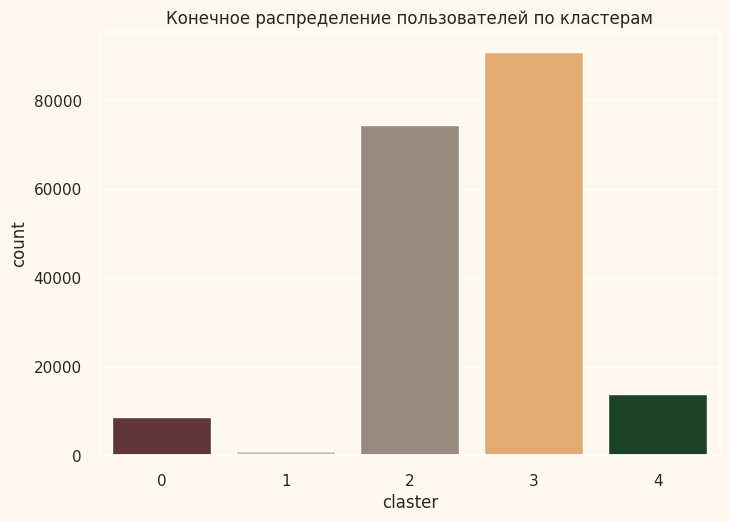

In [76]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#134B21"]
pl = sns.countplot(x=res["claster"], palette= pal)
pl.set_title("Конечное распределение пользователей по кластерам")
plt.show()